In [3]:
import pandas as pd

benin = pd.read_csv("data/benin_clean.csv", parse_dates=['Timestamp'])
togo = pd.read_csv("data/togo_clean.csv", parse_dates=['Timestamp'])
serrialeone = pd.read_csv("data/sierraleone_clean.csv", parse_dates=['Timestamp'])


In [4]:
comparison_metrics = []

for country_name, df in zip(['Benin', 'Togo', 'Serrialeone'], [benin, togo, serrialeone]):
    avg_ghi = df['GHI'].mean()
    avg_dni = df['DNI'].mean()
    avg_dhi = df['DHI'].mean()
    avg_moda = df['ModA'].mean()
    avg_modb = df['ModB'].mean()
    
    comparison_metrics.append({
        'Country': country_name,
        'Avg GHI': avg_ghi,
        'Avg DNI': avg_dni,
        'Avg DHI': avg_dhi,
        'Avg ModA': avg_moda,
        'Avg ModB': avg_modb
    })

comparison_df = pd.DataFrame(comparison_metrics)
comparison_df


,Country,Avg GHI,Avg DNI,Avg DHI,Avg ModA,Avg ModB
0,Benin,241.739837,167.438243,112.371911,236.524528,228.737160
1,Togo,230.975210,149.368966,112.408673,225.827121,219.104385
2,Serrialeone,198.689042,104.664299,112.421189,203.054922,193.719867


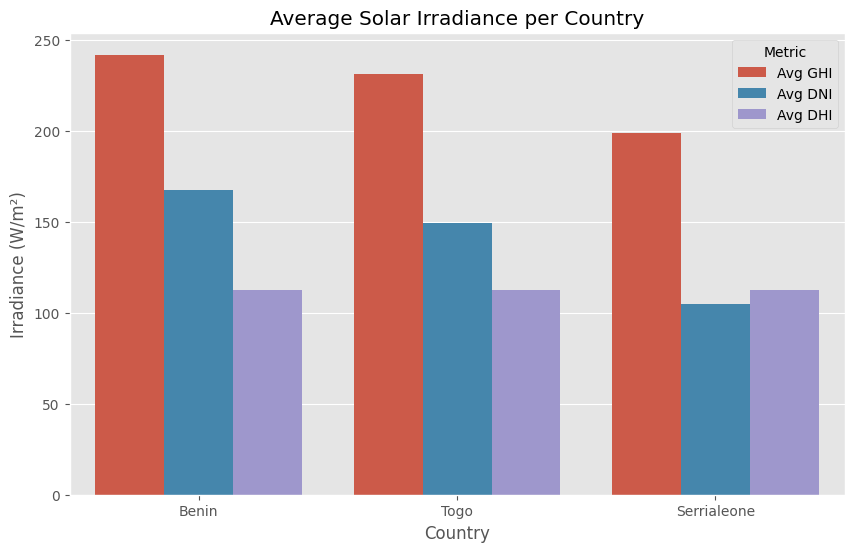

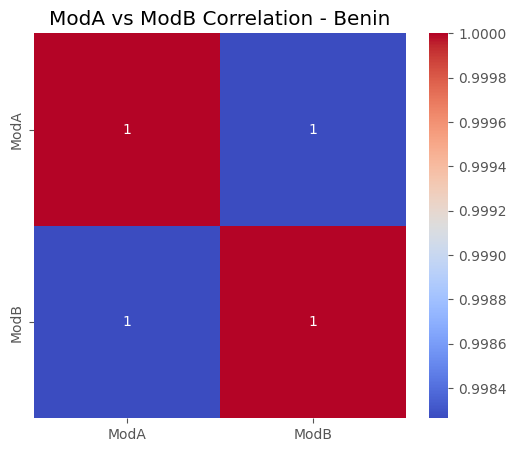

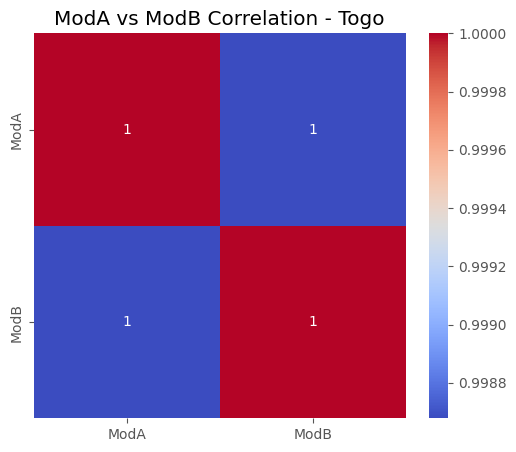

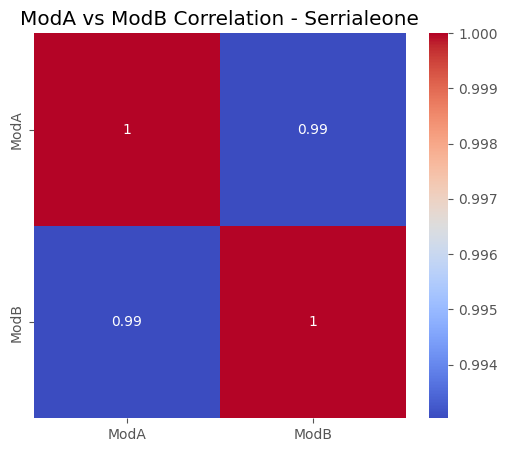

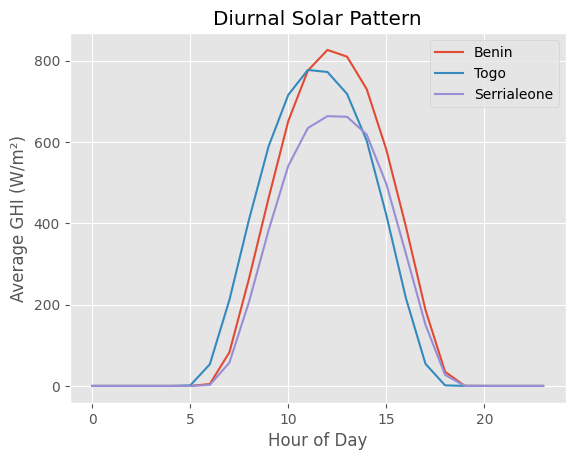

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid style
plt.style.use('ggplot')

# Load cleaned datasets
benin = pd.read_csv("data/benin_clean.csv", parse_dates=['Timestamp'])
togo = pd.read_csv("data/togo_clean.csv", parse_dates=['Timestamp'])
serrialeone = pd.read_csv("data/sierraleone_clean.csv", parse_dates=['Timestamp'])

# List of countries and dfs
countries = ['Benin', 'Togo', 'Serrialeone']
dfs = [benin, togo, serrialeone]

# -----------------------------
# 1. Bar chart: average GHI/DNI/DHI per country
# -----------------------------
avg_metrics = []
for country, df in zip(countries, dfs):
    avg_metrics.append({
        'Country': country,
        'Avg GHI': df['GHI'].mean(),
        'Avg DNI': df['DNI'].mean(),
        'Avg DHI': df['DHI'].mean()
    })
avg_df = pd.DataFrame(avg_metrics)

avg_df_melted = avg_df.melt(id_vars='Country', var_name='Metric', value_name='Value')

plt.figure(figsize=(10,6))
sns.barplot(data=avg_df_melted, x='Country', y='Value', hue='Metric')
plt.title('Average Solar Irradiance per Country')
plt.ylabel('Irradiance (W/m²)')
plt.show()

# -----------------------------
# 2. Heatmap: ModA vs ModB per country
# -----------------------------
for country, df in zip(countries, dfs):
    plt.figure(figsize=(6,5))
    corr = df[['ModA', 'ModB']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'ModA vs ModB Correlation - {country}')
    plt.show()

# -----------------------------
# 3. Line chart: diurnal solar pattern (time-of-day vs GHI)
# -----------------------------
for country, df in zip(countries, dfs):
    df['Hour'] = df['Timestamp'].dt.hour
    hourly_avg = df.groupby('Hour')['GHI'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, label=country)

plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.title('Diurnal Solar Pattern')
plt.legend()
plt.show()
